<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages-and-Data" data-toc-modified-id="Import-Packages-and-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages and Data</a></span></li><li><span><a href="#EDA-and-Feature-Engineering" data-toc-modified-id="EDA-and-Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA and Feature Engineering</a></span></li><li><span><a href="#Breakdown-on-modelling-procedude" data-toc-modified-id="Breakdown-on-modelling-procedude-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Breakdown on modelling procedude</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Elastic-Net-Regression" data-toc-modified-id="Elastic-Net-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Elastic Net Regression</a></span></li><li><span><a href="#KNN-Regression" data-toc-modified-id="KNN-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>KNN Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Support Vector Regression</a></span></li></ul></div>

# Exploration of Regression Algorithms on House Prices Dataset

Our goal is to find out if can we can predict the prices of residential homes in Ames, Iowa.

This is based on Kaggle's House Prices Prediciton competition. The idea behind the notebook is to maintain basic code snippets of the various steps in a regression problem. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Import Packages and Data

In [632]:
# Importing general purpose libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

# Importing model selection and evaluation libraries

# Train-test-validation dataset creation
from sklearn.model_selection import train_test_split

# Data normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline

# Hyperparameter tuning and Crossvalidation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV ,cross_val_score, KFold

# Accuracy
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Importing models

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Data sourced form  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



In [592]:
# Import data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## EDA and Feature Engineering

In [593]:
# Displaying first 5 rows

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [594]:
#Save the 'Id' column

train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.

train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [595]:
# Number of rows and columns

print('test ', test_df.shape)
print('train ',train_df.shape)

test  (1459, 79)
train  (1460, 80)


In [596]:
#Use pandas_profiling to get some detailed descriptive statistics

pandas_profiling.ProfileReport(train_df)

Number of variables,80
Number of observations,1460
Total Missing (%),6.0%
Total size in memory,912.6 KiB
Average record size in memory,640.1 B
Numeric,37
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Based on initial inspection we see that:

- 2ndFlrSF has 829 / 56.8% zeros
- 3SsnPorch has 1436 / 98.4% zeros
- Alley has 1369 / 93.8% missing values
- BsmtCond has 37 / 2.5% missing values
- BsmtExposure has 38 / 2.6% missing values
- BsmtFinSF1 has 467 / 32.0% zeros
- BsmtFinSF2 has 1293 / 88.6% zeros
- BsmtFinType1 has 37 / 2.5% missing values
- BsmtFinType2 has 38 / 2.6% missing values
- BsmtFullBath has 856 / 58.6% zeros
- BsmtHalfBath has 1378 / 94.4% zeros
- BsmtQual has 37 / 2.5% missing values
- BsmtUnfSF has 118 / 8.1% zeros
- EnclosedPorch has 1252 / 85.8% zeros
- Fence has 1179 / 80.8% missing values
- FireplaceQu has 690 / 47.3% missing values
- Fireplaces has 690 / 47.3% zeros
- GarageArea has 81 / 5.5% zeros
- GarageCars has 81 / 5.5% zeros
- GarageCond has 81 / 5.5% missing values
- GarageFinish has 81 / 5.5% missing values
- GarageQual has 81 / 5.5% missing values
- GarageType has 81 / 5.5% missing values
- GarageYrBlt has 81 / 5.5% missing values
- HalfBath has 913 / 62.5% zeros
- LotFrontage has 259 / 17.7% missing values
- LowQualFinSF has 1434 / 98.2% zeros
- MasVnrArea has 861 / 59.0% zeros
- MiscFeature has 1406 / 96.3% missing values
- MiscVal has 1408 / 96.4% zeros
- OpenPorchSF has 656 / 44.9% zeros
- PoolArea has 1453 / 99.5% zeros
- PoolQC has 1453 / 99.5% missing values
- ScreenPorch has 1344 / 92.1% zeros
- TotalBsmtSF has 37 / 2.5% zeros
- WoodDeckSF has 761 / 52.1% zeros

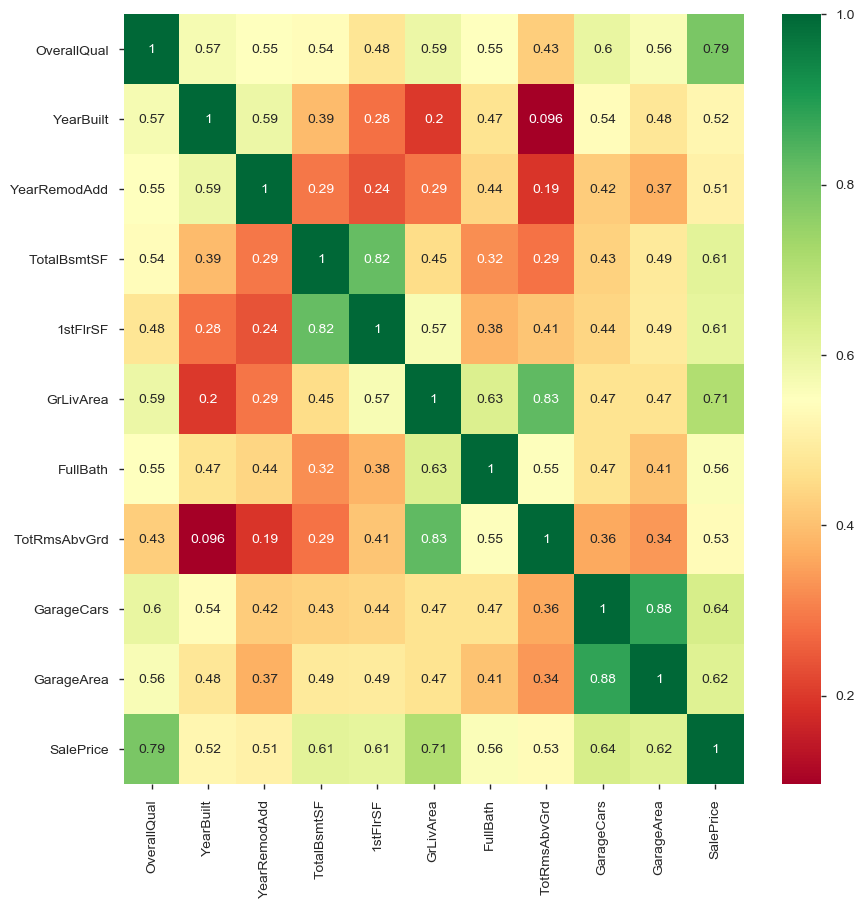

In [597]:
# Most correlated features

Y = "SalePrice"
threshold = 0.5

corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat[Y])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- From this we can tell which features (OverallQual, GrLivArea and TotalBsmtSF ) are highly positively correlated with the SalePrice.  
- GarageCars and GarageArea also seems correlated with other, since the no. of car that will fit into the garage will depend on GarageArea.

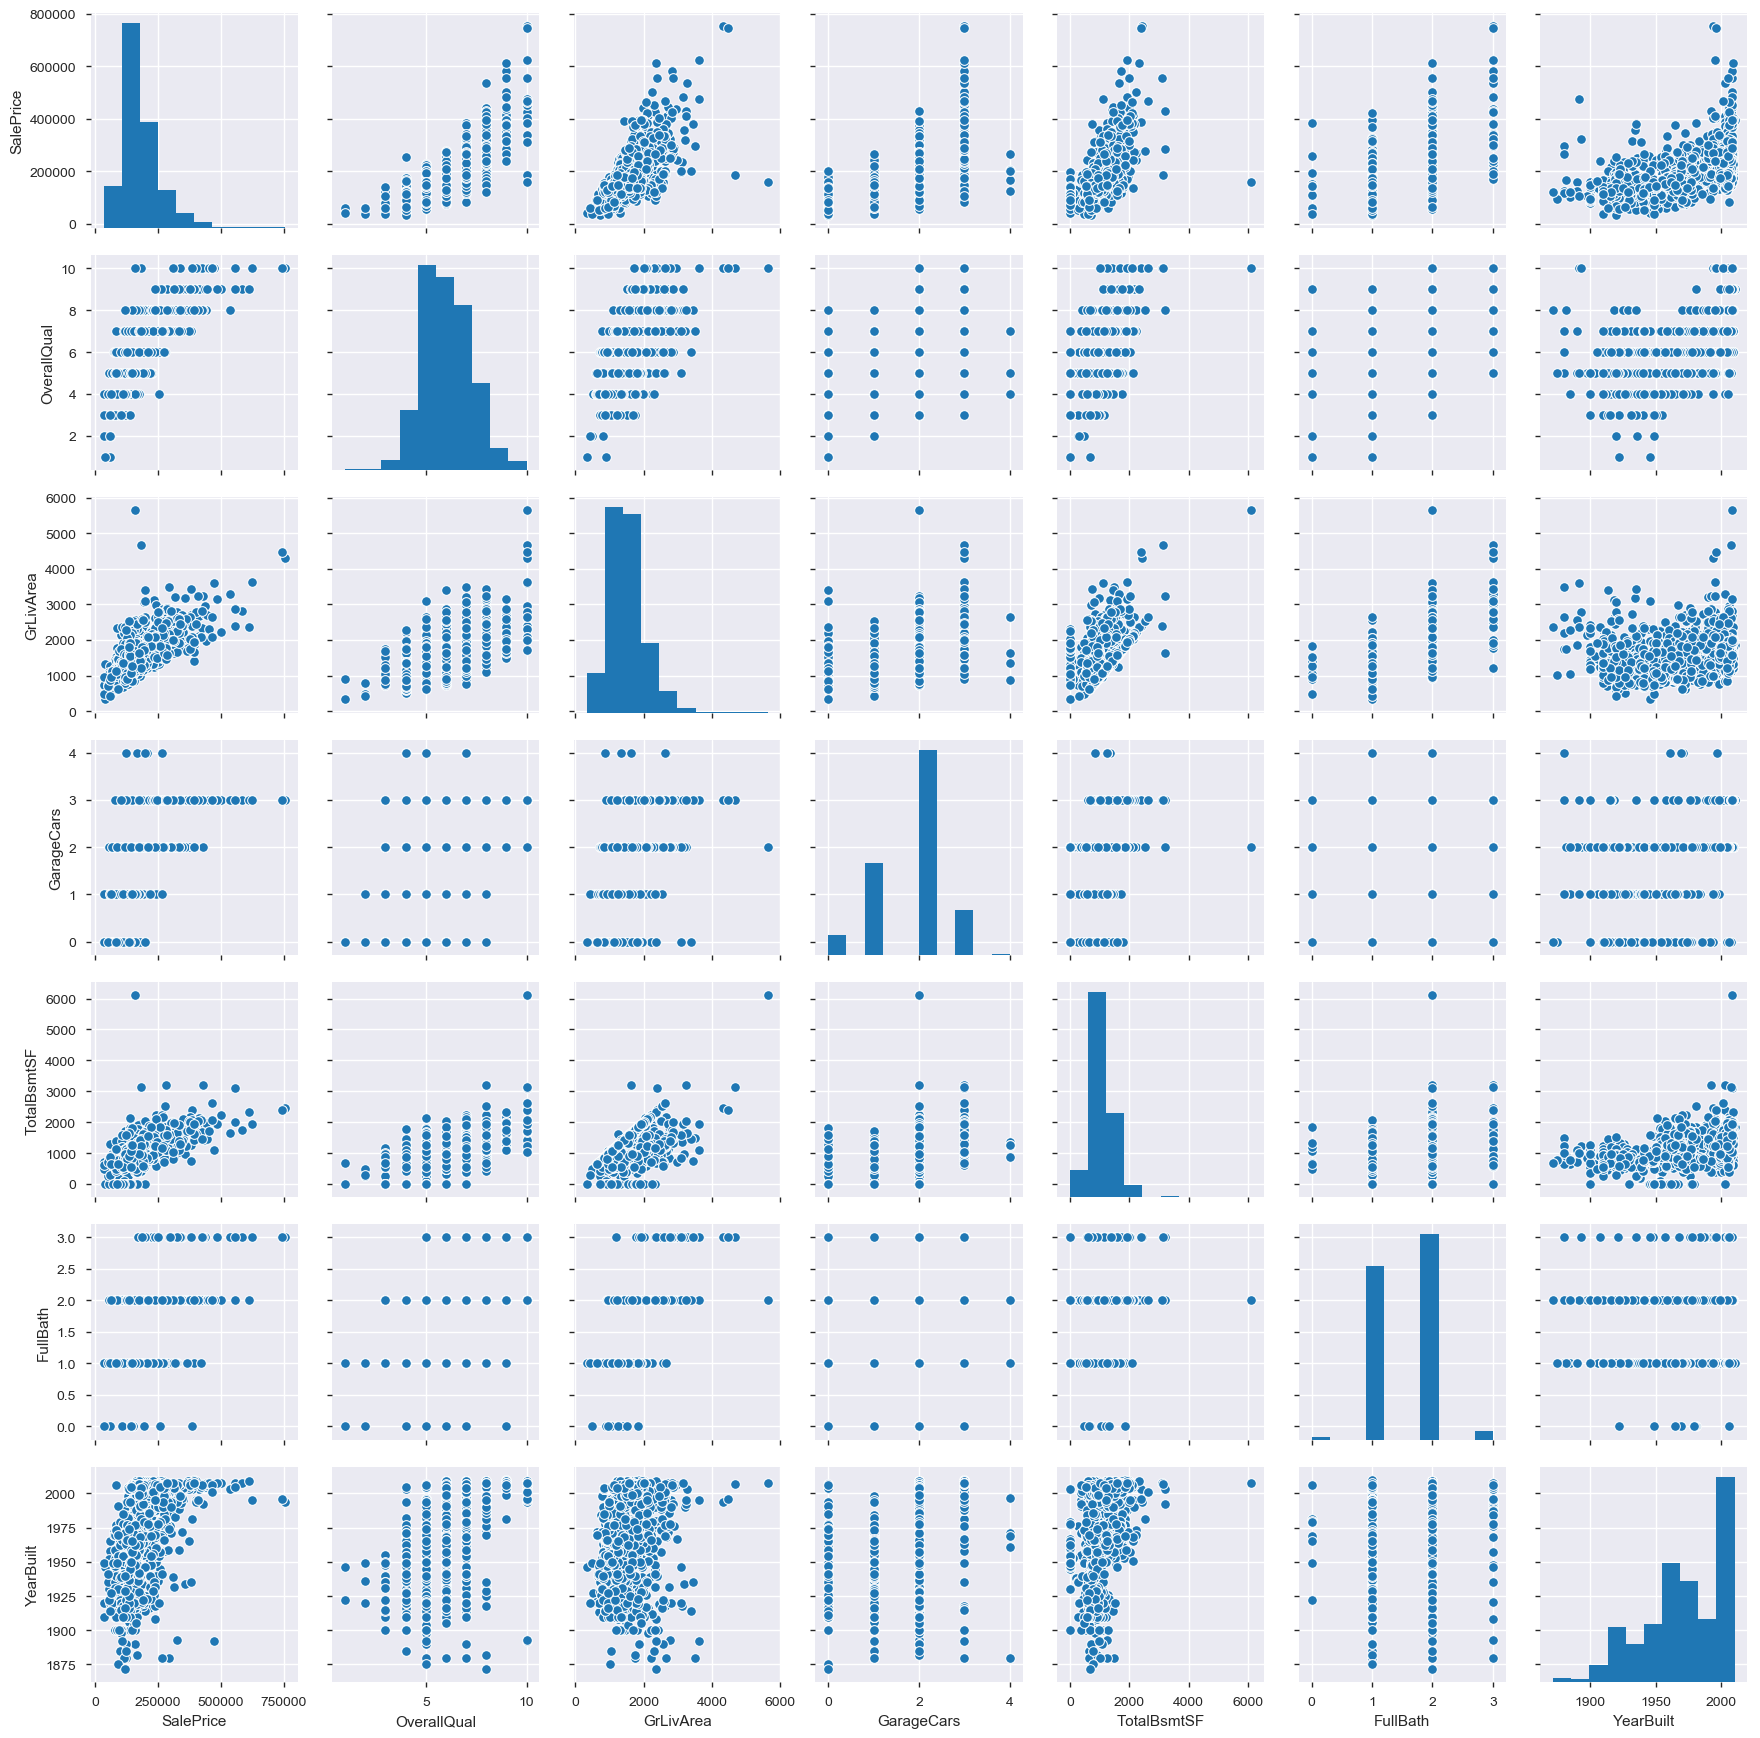

In [598]:
# Scatter plot of correlated variables

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(train_df[cols], size = 2.5)
plt.show()

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'.

We can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


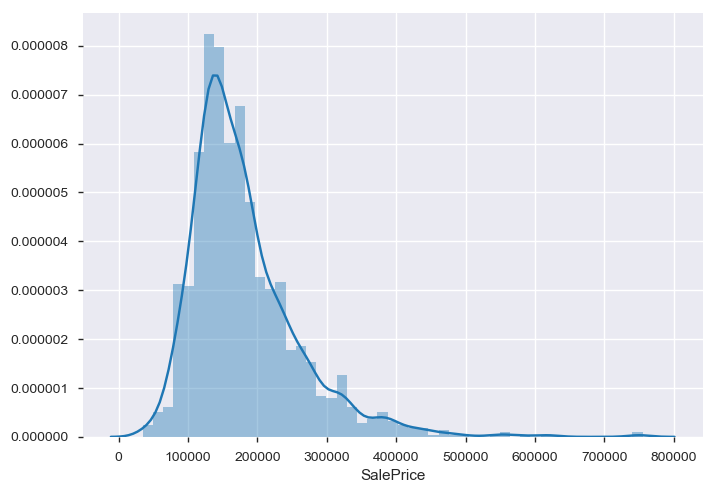

In [599]:
# EDA on our target variable

Y = "SalePrice"

print(train_df[Y].describe() )

# Histogram

sns.distplot(train_df[Y]);

All the values are above zero. This distribution is positively skewed. Let us log transform the data.

In [600]:
# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column

#train_df[Y] = np.log1p(train_df[Y])

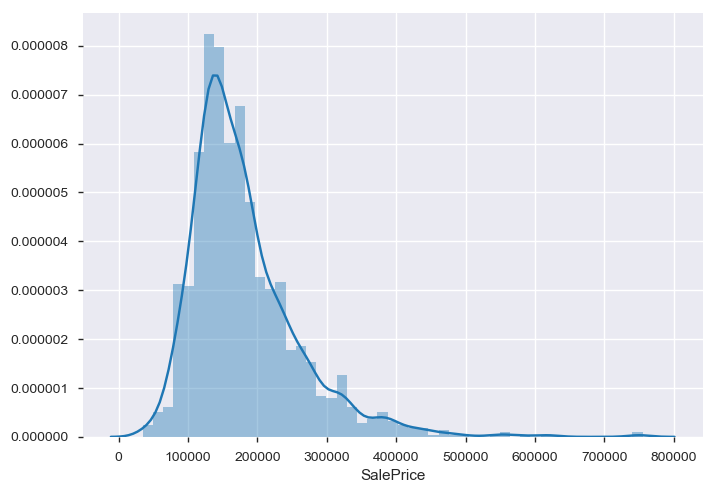

In [601]:
# Histogram

sns.distplot(train_df[Y]);

After taking logarithm of the same data the curve seems to be normally distributed.

In [602]:
# Concatenate both train and test values

target = train_df.SalePrice.values

ntrain = train_df.shape[0]
ntest = test_df.shape[0]

df = pd.concat((train_df, test_df)).reset_index(drop=True)
df.drop([Y], axis=1, inplace=True)
print("Combined data size is : {}".format(df.shape))

Combined data size is : (2919, 79)


In [603]:
# EDA on the combined dataset

stats = []
for col in df.columns:
    stats.append(
        (col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0],
         df[col].value_counts(normalize=True, dropna=False).values[0] * 100,
         df[col].dtype))

stats_df = pd.DataFrame(
    stats,
    columns=[
        'Feature', 'Unique_values', 'Percentage of missing values',
        'Percentage of values in the biggest category', 'type'
    ])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
65,PoolQC,3,99.657417,99.657417,object
56,MiscFeature,4,96.402878,96.402878,object
3,Alley,2,93.216855,93.216855,object
25,Fence,4,80.438506,80.438506,object
26,FireplaceQu,5,48.646797,48.646797,object
49,LotFrontage,128,16.649538,16.649538,float64
37,GarageYrBlt,103,5.447071,5.447071,float64
35,GarageQual,5,5.447071,89.208633,object
34,GarageFinish,3,5.447071,42.137718,object
33,GarageCond,5,5.447071,90.921548,object


The data_description.txt file https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data has information on what the missing values represent. We will use that information to clean up the missing values in the data.

In [604]:
# replace NA with None for the below columns

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType','MSSubClass'):
    df[col] = df[col].fillna('None')

In [605]:
# replace NA with 0 for the below columns

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath','MasVnrArea'):
    df[col] = df[col].fillna(0)

In [606]:
# Group by neighborhood and fill in missing value by the median LotFrontage the neighborhood

df["LotFrontage"].fillna(df.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

In [607]:
# Find the most common value

df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [608]:
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [609]:
# Scaling the process to other catergorical values

for col in ('Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType' ):
    df[col] = df[col].fillna(df[col].mode()[0])

In [610]:
# Find the most common value

df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [611]:
# Almost all rows have the same values

df = df.drop(['Utilities'], axis=1)

In [612]:
# EDA on the cleaned dataset

stats = []
for col in df.columns:
    stats.append(
        (col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0],
         df[col].value_counts(normalize=True, dropna=False).values[0] * 100,
         df[col].dtype))

stats_df = pd.DataFrame(
    stats,
    columns=[
        'Feature', 'Unique_values', 'Percentage of missing values',
        'Percentage of values in the biggest category', 'type'
    ])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
30,Functional,7,0.068517,93.079822,object
49,LotFrontage,130,0.000000,10.311751,float64
56,MiscFeature,5,0.000000,96.402878,object
55,MasVnrType,4,0.000000,60.500171,object
54,MasVnrArea,444,0.000000,60.328880,float64
53,MSZoning,5,0.000000,77.732100,object
52,MSSubClass,16,0.000000,36.964714,int64
51,LowQualFinSF,36,0.000000,98.629668,int64
50,LotShape,4,0.000000,63.686194,object
0,1stFlrSF,1083,0.000000,1.575882,int64


We no longer have missing values in our dataset. Now there any many features that are numerical but categorical.

In [613]:
# Lot of columns have very few unique values

stats_df.sort_values('Unique_values', ascending=True)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
71,Street,2,0.0,99.588900,object
16,CentralAir,2,0.0,93.285372,object
39,HalfBath,3,0.0,62.829736,int64
13,BsmtHalfBath,3,0.0,94.004796,float64
63,PavedDrive,3,0.0,90.476190,object
46,LandSlope,3,0.0,95.169579,object
3,Alley,3,0.0,93.216855,object
65,PoolQC,4,0.0,99.657417,object
55,MasVnrType,4,0.0,60.500171,object
12,BsmtFullBath,4,0.0,58.478931,float64


In [614]:
#Transform non numeric columns

cols_to_transform = [
    'FireplaceQu', 'BsmtQual', 'GarageQual', 'GarageCond', 'ExterQual','Heating','MSZoning',
    'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','LandContour',
    'BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','Neighborhood',
    'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass','LotConfig',
    'RoofMatl',
    'OverallCond', 'YrSold', 'MoSold', 'BldgType', 'Condition1', 'Condition2', 'MiscFeature',
    'GarageType', 'BsmtCond', 'BsmtExposure', 'Foundation', 'MSSubClass','Electrical','Exterior1st','Exterior2nd','MasVnrType','HouseStyle'
]
df_dummy = pd.get_dummies(df, columns=cols_to_transform)
df_dummy.shape

(2919, 336)

In [615]:
df_dummy = pd.get_dummies(df)
df_dummy.shape

(2919, 300)

Splitting back intro train and test.

In [616]:
train = df_dummy[:ntrain]
test = df_dummy[ntrain:]
train.shape

(1460, 300)

## Breakdown on modelling procedude

We will train different models to understand their performance. We will split the train data initally into train - test (validation) so that we can compare the results of different models on the same test dataset.

In the end we will use Nested Cross validation to choose which model is best suited for our dataset. 

In [617]:
# Creating validation dataset

X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.20, random_state=1)

The below function creates the pipeline for normalization and grid search based on conditions specified by the user in the control panel.

In [618]:
def create_pipeline(norm, model):
    if norm == 1:
        scale = StandardScaler()
        pipe = Pipeline([('norm', scale), ('reg', model)])
    elif norm == 2:
        scale = MinMaxScaler()
        pipe = Pipeline([('norm', scale), ('reg', model)])
    else:
        pipe = Pipeline([('reg', model)])
    return pipe

The below function performs grid search for provided parameter grid and returns best model object.

In [619]:
def run_model(model, param_grid, X_train, y_train, score_criteria, folds,see_details, norm=0 , jobs =2):
    pipe = create_pipeline(norm, model)
    model_grid = GridSearchCV(pipe, param_grid,cv=folds,scoring=score_criteria,verbose=see_details,n_jobs=jobs, refit=True)
    model_grid.fit(X_train, y_train)
    return model_grid.best_estimator_ , model_grid.best_params_ ,model_grid.best_score_

The below function calculates all the relevant metrics for the best hyper-parameter combination and returns a pandas series of these metrics.

In [620]:
def get_model_eval(model, X_train, Y_train, X_test, Y_test):
    return pd.Series([mean_squared_error(Y_train, model.predict(X_train)),
                      mean_squared_error(Y_test, model.predict(X_test)),
                      (abs(model.predict(X_train) - Y_train) / Y_train).mean(),
                      (abs(model.predict(X_test) - Y_test) / Y_test).mean()])

We will use a nested cross validation to select the best performing model. Creating a common function to calculate the nested cross validation score.

In [621]:
def model_sel(model, tuned_parameters, n1, n2, X, y):
    inner_cv = KFold(n_splits=n1, shuffle=True,  random_state= 5)
    outer_cv = KFold(n_splits=n2, shuffle=True,  random_state= 5)
    pipe = create_pipeline(norm, model)
    clf = GridSearchCV(model, tuned_parameters, cv = inner_cv)
    nested_score = cross_val_score(clf, X, y, cv = outer_cv, scoring = score_criteria)
    nested_score = np.sqrt(np.abs(nested_score))
    RMSE = nested_score.mean()
    STD = nested_score.std()
    return RMSE, STD

In [622]:
# Specify model selection criteria
# Possible values are:
# ‘explained_variance’
# ‘neg_mean_absolute_error’
# ‘neg_mean_squared_error’
# ‘neg_mean_squared_log_error’
# ‘neg_median_absolute_error’
# ‘r2’
score_criteria = 'neg_mean_squared_error'

# Specify details of terminal output you'd like to see
# 0 - No output, 1 - All details, 2 - Progress bar
# Outputs might vary based on individual functions
see_details = 0

# Set type of normalization you want to perform
# 0 - No Normalization, 1 - Min-max scaling, 2 - Zscore scaling
norm = 0

# No of folds

folds =5

In [623]:
del results
results = pd.DataFrame(columns=['TrainRMSE', 'TestRMSE','TrainMAPE', 'TestMAPE', 'Model', 'BestParams'])

## Linear Regression

In [624]:
LinearRegressionParams= {}

In [625]:
model = LinearRegression
best_model, best_params, best_score = run_model(
    model(), LinearRegressionParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'LinearRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results

Best Score: 1.0820134749899657e+19
Best params: {}


,TrainRMSE,TestRMSE,TrainMAPE,TestMAPE,Model,BestParams
0,3.985866e+08,2.454234e+15,0.072577,50.979444,LinearRegression,{}


## Ridge Regression

In [628]:
RidgeParams= {'reg__alpha': [0.01,0.1, 1,10, 100]}

Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

In [629]:
model = Ridge
best_model, best_params, best_score = run_model(
    model(), RidgeParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'RidgeRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results

Best Score: 1162793496.1949844
Best params: {'reg__alpha': 10}


,TrainRMSE,TestRMSE,TrainMAPE,TestMAPE,Model,BestParams
0,3.985866e+08,2.454234e+15,0.072577,50.979444,LinearRegression,{}
0,6.096045e+08,1.004357e+09,0.086043,0.116262,RidgeRegression,{'reg__alpha': 10}


## Lasso Regression

In [630]:
LassoParams= {'reg__alpha': [0.01,0.1, 1,10, 100]}

Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square

In [631]:
model = Lasso
best_model, best_params, best_score = run_model(
    model(), LassoParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'LassoRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results

Best Score: 1191915444.6634803
Best params: {'reg__alpha': 100}


,TrainRMSE,TestRMSE,TrainMAPE,TestMAPE,Model,BestParams
0,3.985866e+08,2.454234e+15,0.072577,50.979444,LinearRegression,{}
0,6.096045e+08,1.004357e+09,0.086043,0.116262,RidgeRegression,{'reg__alpha': 10}
0,5.006937e+08,7.875501e+08,0.081197,0.101504,LassoRegression,{'reg__alpha': 100}


## Elastic Net Regression

Elastic net regression allows for the maximum flexibility in terms of finding the best combination of ridge and lasso regression characteristics. This flexibility is what gives elastic net its power.

In [640]:
ElasticNetParams={'reg__alpha':[0.001,0.01,0.1, 1,10, 100,1000],'reg__l1_ratio':[0,.1,.2,.4,.6,.7,.8,.9,1]}

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso.

In [641]:
model = ElasticNet
best_model, best_params, best_score = run_model(
    model(), ElasticNetParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'ElasticNetRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results

Best Score: 1161599180.153389
Best params: {'reg__alpha': 0.1, 'reg__l1_ratio': 0.8}


,TrainRMSE,TestRMSE,TrainMAPE,TestMAPE,Model,BestParams
0,3.985866e+08,2.454234e+15,0.072577,50.979444,LinearRegression,{}
0,6.096045e+08,1.004357e+09,0.086043,0.116262,RidgeRegression,{'reg__alpha': 10}
0,5.006937e+08,7.875501e+08,0.081197,0.101504,LassoRegression,{'reg__alpha': 100}
0,6.686231e+08,1.008503e+09,0.087818,0.112700,ElasticNetRegression,"{'reg__alpha': 0.1, 'reg__l1_ratio': 0.8}"
0,6.686231e+08,1.008503e+09,0.087818,0.112700,ElasticNetRegression,"{'reg__alpha': 0.1, 'reg__l1_ratio': 0.8}"


## KNN Regression

In [651]:
KNNParams= {'reg__n_neighbors': np.linspace(1, 20, 20,dtype = int, endpoint=True),
           'reg__algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
           'reg__metric' : ["euclidean", "cityblock","manhattan" , "l1","l2"], 
           'reg__weights' : ['uniform', 'distance']
           }

- n_neighbors: Number of neighbors to use
- algorithm: Algorithm used to compute the nearest neighbors
- metric: The distance metric to use
- weights: weight function used in prediction. Possible values,  
    -- ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.      
    -- ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. 

In [652]:
model = KNeighborsRegressor
best_model, best_params, best_score = run_model(
    model(), KNNParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'KNNRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results

Best Score: 1741851328.20881
Best params: {'reg__algorithm': 'auto', 'reg__metric': 'cityblock', 'reg__n_neighbors': 6, 'reg__weights': 'distance'}


,TrainRMSE,TestRMSE,TrainMAPE,TestMAPE,Model,BestParams
0,3.985866e+08,2.454234e+15,0.072577,50.979444,LinearRegression,{}
0,6.096045e+08,1.004357e+09,0.086043,0.116262,RidgeRegression,{'reg__alpha': 10}
0,5.006937e+08,7.875501e+08,0.081197,0.101504,LassoRegression,{'reg__alpha': 100}
0,6.686231e+08,1.008503e+09,0.087818,0.112700,ElasticNetRegression,"{'reg__alpha': 0.1, 'reg__l1_ratio': 0.8}"
0,6.686231e+08,1.008503e+09,0.087818,0.112700,ElasticNetRegression,"{'reg__alpha': 0.1, 'reg__l1_ratio': 0.8}"
0,0.000000e+00,2.349745e+09,0.000000,0.161576,KNNRegression,"{'reg__algorithm': 'auto', 'reg__metric': 'cit..."


## Support Vector Regression

In [654]:
SVRParams = {'reg__C': [0.1, 1,10,100, 1000],
                    'reg__kernel': ['linear', 'poly', 'rbf'],
                    'reg__gamma': [1e-7, 1e-4],
             'reg__degree' : [1,2,3,4] ,        
             'reg__epsilon':[0.1,0.2,0.5,0.3]},

- kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
- C: Penalty parameter C of the error term. It is the parameter for the soft margin cost function. Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.
- gamma: Kernel coefficient for ‘rbf’, ‘poly’. If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.  
- degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- epsilon: No penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [ ]:
model = SVR
best_model, best_params, best_score = run_model(
    model(), SVRParams, X_train, y_train, score_criteria, folds,
    see_details, norm)
stats = get_model_eval(best_model, X_train, y_train, X_valid, y_valid)
stats = pd.DataFrame(stats).transpose()
stats['Model'] = 'SVRegression'
stats['BestParams'] = [best_params]
stats.columns = results.columns
results = results.append(stats)

print("Best Score: {}".format(best_score * -1))
print("Best params: {}".format(best_params))
results